In [496]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from matplotlib_venn import venn3
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC


# Question 1

## Read Data

In [497]:
'''
TODO: Read in the 'HW2_Q1_DATA.csv' file.
'''
data = pd.read_csv("HW2_Q1_Data.csv")
data

,4E-BP1,ADA,AREG,AXIN1,BACH1,BIRC2,BTN3A2,CASP-8,CCL11,CCL19,...,TNFSF14,TRAIL,TRANCE,TREM1,TRIM21,TWEAK,uPA,VEGFA,ZBTB16,Condition
0,27.718344,5.734644,13.165561,6.770850,0.000000,9.756987,0.000000,6.161444,0.000000,3.545201,...,0.000000,0.000000,0.000000,0.000000,10.462921,8.162390,3.209589,0.000000,7.846367,CoV2
1,0.000000,13.791418,5.884233,0.396271,12.521125,0.000000,7.558042,4.814161,0.000000,0.000000,...,5.582112,28.143195,8.333056,1.801868,2.697739,9.918408,1.576225,0.000000,1.988058,CoV2
2,0.000000,0.000000,2.303576,14.225052,3.579328,0.000000,7.902642,0.000000,0.896923,0.000000,...,8.975069,0.000000,10.386741,7.641283,0.000000,11.691916,8.765778,0.000000,0.000000,CoV2
3,29.979020,3.951806,13.588954,0.000000,10.762301,0.000000,0.000000,4.641054,0.000000,5.006941,...,0.349745,0.000000,19.595654,7.518821,2.431795,9.712949,13.143095,0.000000,5.051765,Kawasaki
4,7.169370,6.101314,0.000000,0.000000,0.000000,0.000000,16.860173,25.107465,17.558198,0.000000,...,0.000000,5.717587,0.000000,6.371679,22.049279,7.630129,19.353450,0.000000,0.000000,MIS-C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.790520,0.337248,1.562866,18.700184,4.111790,5.734554,15.703904,0.000000,5.011844,...,10.797769,0.000000,0.000000,9.308869,0.292713,0.900275,0.000000,1.307682,2.411699,MIS-C
996,12.893298,1.508986,9.075896,0.539404,20.283608,4.210682,11.133187,9.904279,3.108829,5.950332,...,13.952176,9.155503,0.000000,3.795481,0.441789,16.565352,3.318809,0.000000,15.117408,Kawasaki
997,0.037542,1.482466,0.000000,8.727819,9.164739,2.906595,0.000000,0.479417,32.973020,0.943259,...,20.631988,0.000000,10.819153,9.044250,0.000000,10.662250,29.164103,12.953029,0.000000,CoV2
998,0.000000,2.040753,21.605513,0.000000,27.944024,0.000000,0.133419,7.776360,0.000000,0.000000,...,0.000000,4.917509,0.000000,5.525309,21.992095,12.846179,0.000000,3.114696,0.000000,MIS-C


## Data Exploration

In [498]:
'''
TODO: Check the distribution of the labels (CoV2, Kawasaki and MIS-C). Consider using value_counts.
'''
value_to_count = ["CoV2", "Kawasaki", "MIS-C"]
counts_CoV2 = (data['Condition'] == value_to_count[0]).sum()
counts_Kawasaki = (data['Condition'] == value_to_count[1]).sum()
counts_MISC = (data['Condition'] == value_to_count[2]).sum()
value_counts = [counts_CoV2,counts_Kawasaki, counts_MISC]


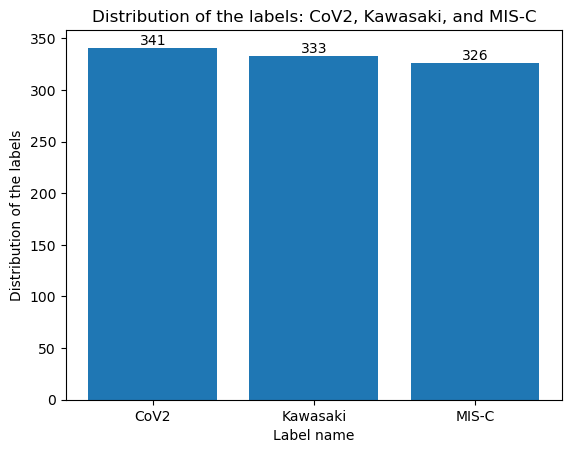

In [499]:
'''
TODO: Generate a barplot to show the counts of the labels
'''
# Create a bar plot
plt.bar(value_to_count, value_counts)

# Adding labels and title
plt.xlabel('Label name')
plt.ylabel('Distribution of the labels')
plt.title('Distribution of the labels: CoV2, Kawasaki, and MIS-C')

for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')


# Display the plot
plt.show()



# Question 2: Filter-based Feature Selection

## 2.1.1: Mutual Information

In [500]:
'''
TODO: Implement a filter-based feature selection method based on Mutual Information using 10-fold cross validation
      Use the results to choose the top 20 features


TIPS: 1. Research and import desired feature selection methods from https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection
      2. You might consider using mutual_info_classif() and mutual_info_regression() for this question
'''

# Separate out features and labels from the data 
features = data.iloc[:, :-1]
labels = data.iloc[:, -1]
 

cross_validation = KFold(n_splits=10, shuffle=True, random_state=1)

def featureSelection (f, l):
      num_of_features = 20
      total_mutual_information_score = np.zeros(133)
      for i, j in cross_validation.split(f, l):
            f_train, f_test = f.iloc[i], f.iloc[j]
            l_train, l_test = l.iloc[i], l.iloc[j]
            mutual_information = mutual_info_classif(f_train, l_train)
            total_mutual_information_score = np.add(total_mutual_information_score, mutual_information)

      
      avg_mutual_information_score = total_mutual_information_score/10
      sorted_mutual_information = np.argsort(avg_mutual_information_score)[::-1]
      
      twenty_top_features = sorted_mutual_information[:num_of_features]
     
      # Top 20 features
      features_to_return = dict()
      for index in twenty_top_features:
            feature_name = f.columns[index]
            mi_score = avg_mutual_information_score[index]
            features_to_return[feature_name] = mi_score

      # All features sorted based on their mutual information score 
      mi_scores_to_return = dict()
      for index in sorted_mutual_information:
            feature_name = f.columns[index]
            mi_score = avg_mutual_information_score[index]
            mi_scores_to_return[feature_name] = mi_score

     
      return features_to_return, mi_scores_to_return
# pd.DataFrame([features_to_return])
twenty_features, sorted_mi = featureSelection(features, labels)


In [501]:
twenty_features

{'OPG': 0.2933015028561899,
 'HGF': 0.1654706015442816,
 'CSF-1': 0.14593636837109486,
 'uPA': 0.11055251581749166,
 'TNFRSF9': 0.09505746604056502,
 'CXCL10': 0.08883693154323295,
 'FAM3B': 0.08703543872466124,
 'STC1': 0.08391804297831022,
 'PTH1R': 0.08035737178652329,
 'IL-17A': 0.07875238975660108,
 'SIT1': 0.07152961712274139,
 'DNER': 0.06909260657568558,
 'EDAR': 0.06522825676597055,
 'CD5': 0.06293769752887646,
 'DCBLD2': 0.05187824632782549,
 'MMP-10': 0.048414829730781796,
 'DPP10': 0.047769409182070066,
 'CCL25': 0.0472313220047406,
 'ADA': 0.04714182340999433,
 'CCL23': 0.04436827802780412}

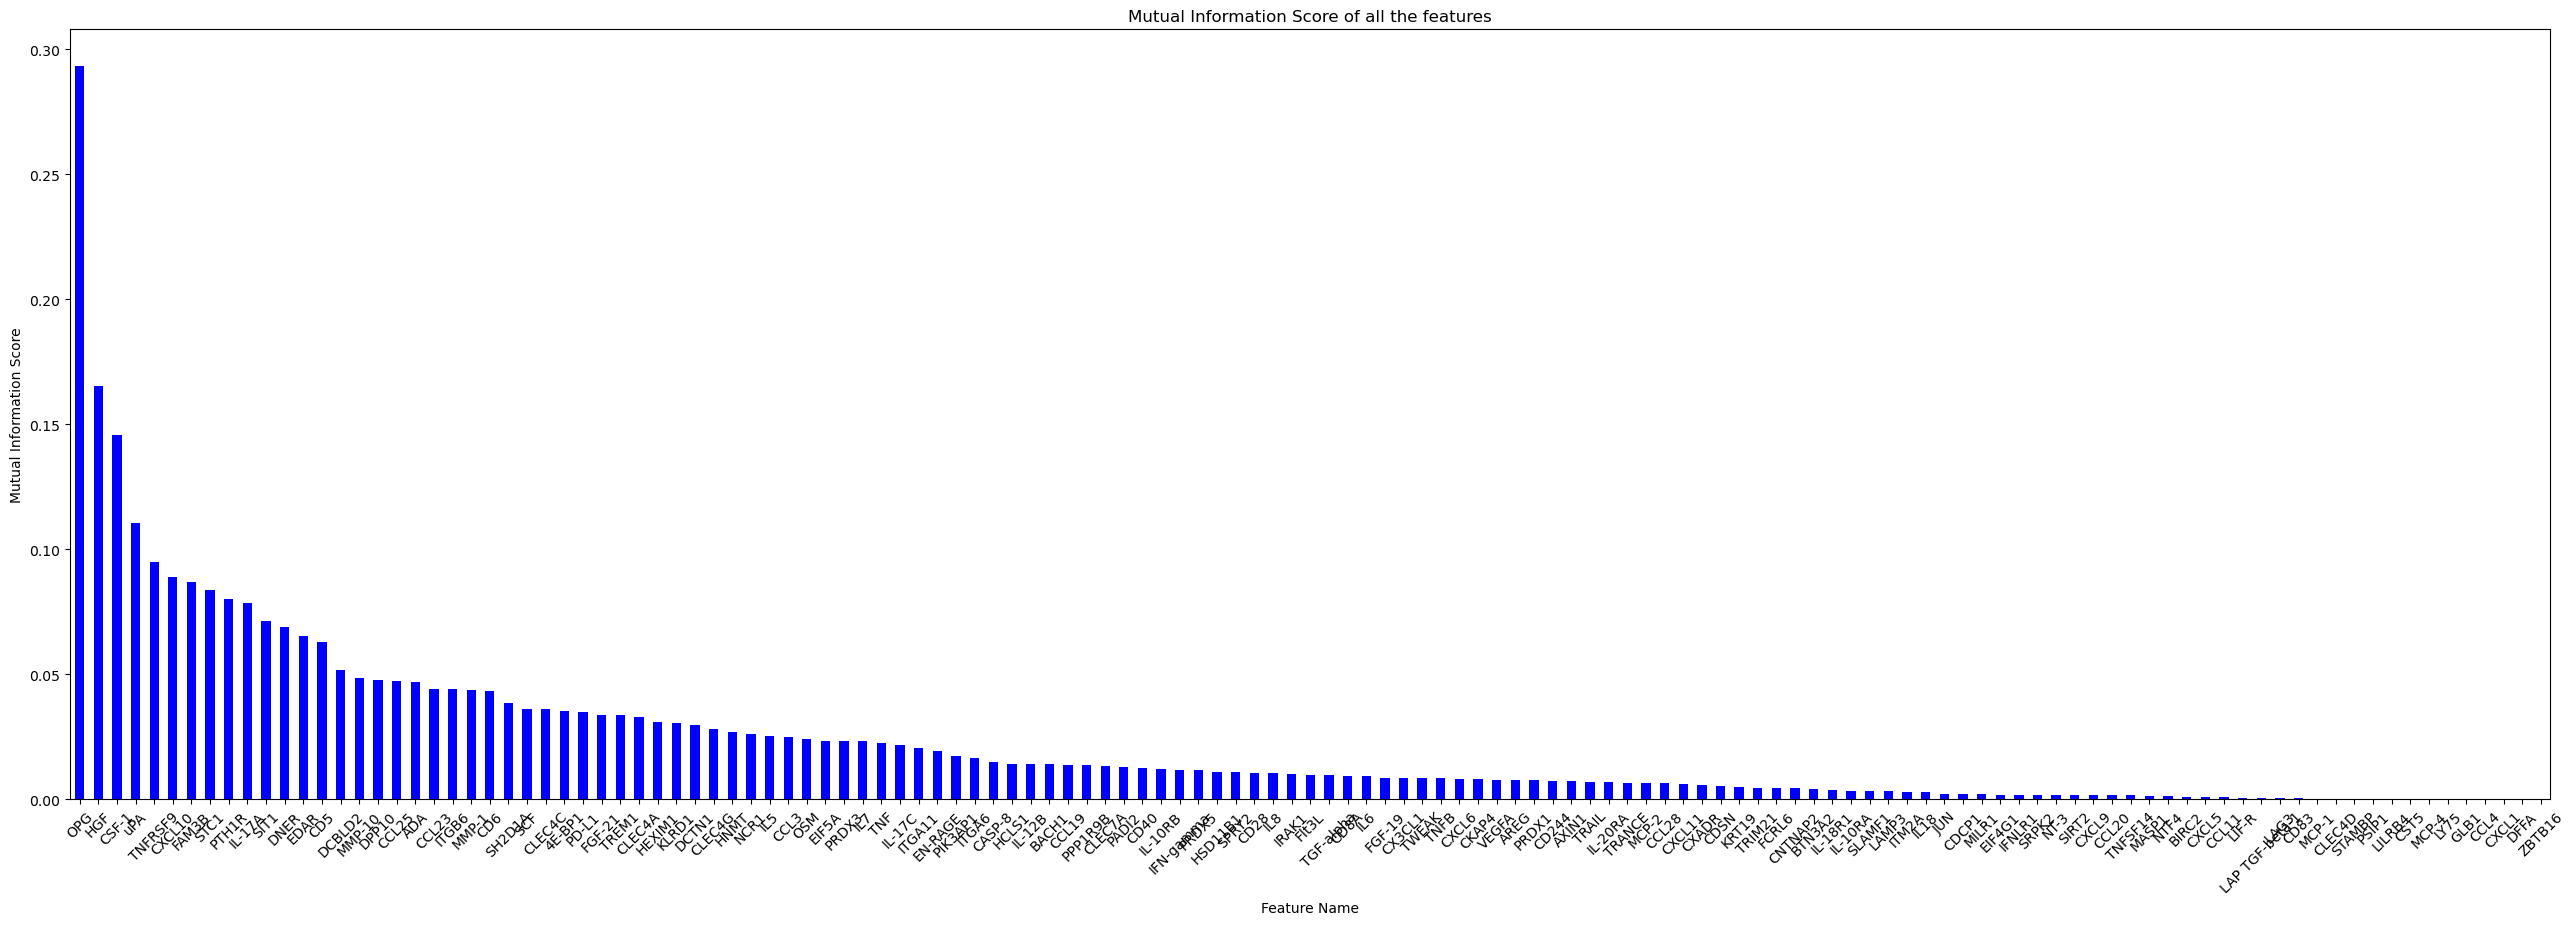

In [502]:
'''
TODO: Plot the sorted mutual information scores in a bar plot.
'''
sorted_mi_scores = pd.Series(sorted_mi)
plt.figure(figsize=(32, 10)) 
#plt.bar(list(sorted_mi.keys()), list(sorted_mi.values()))
sorted_mi_scores.plot(kind='bar', color='blue')

plt.xlabel('Feature Name')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score of all the features')
plt.xticks(rotation=45)

plt.show()

## 2.1.2: Another method

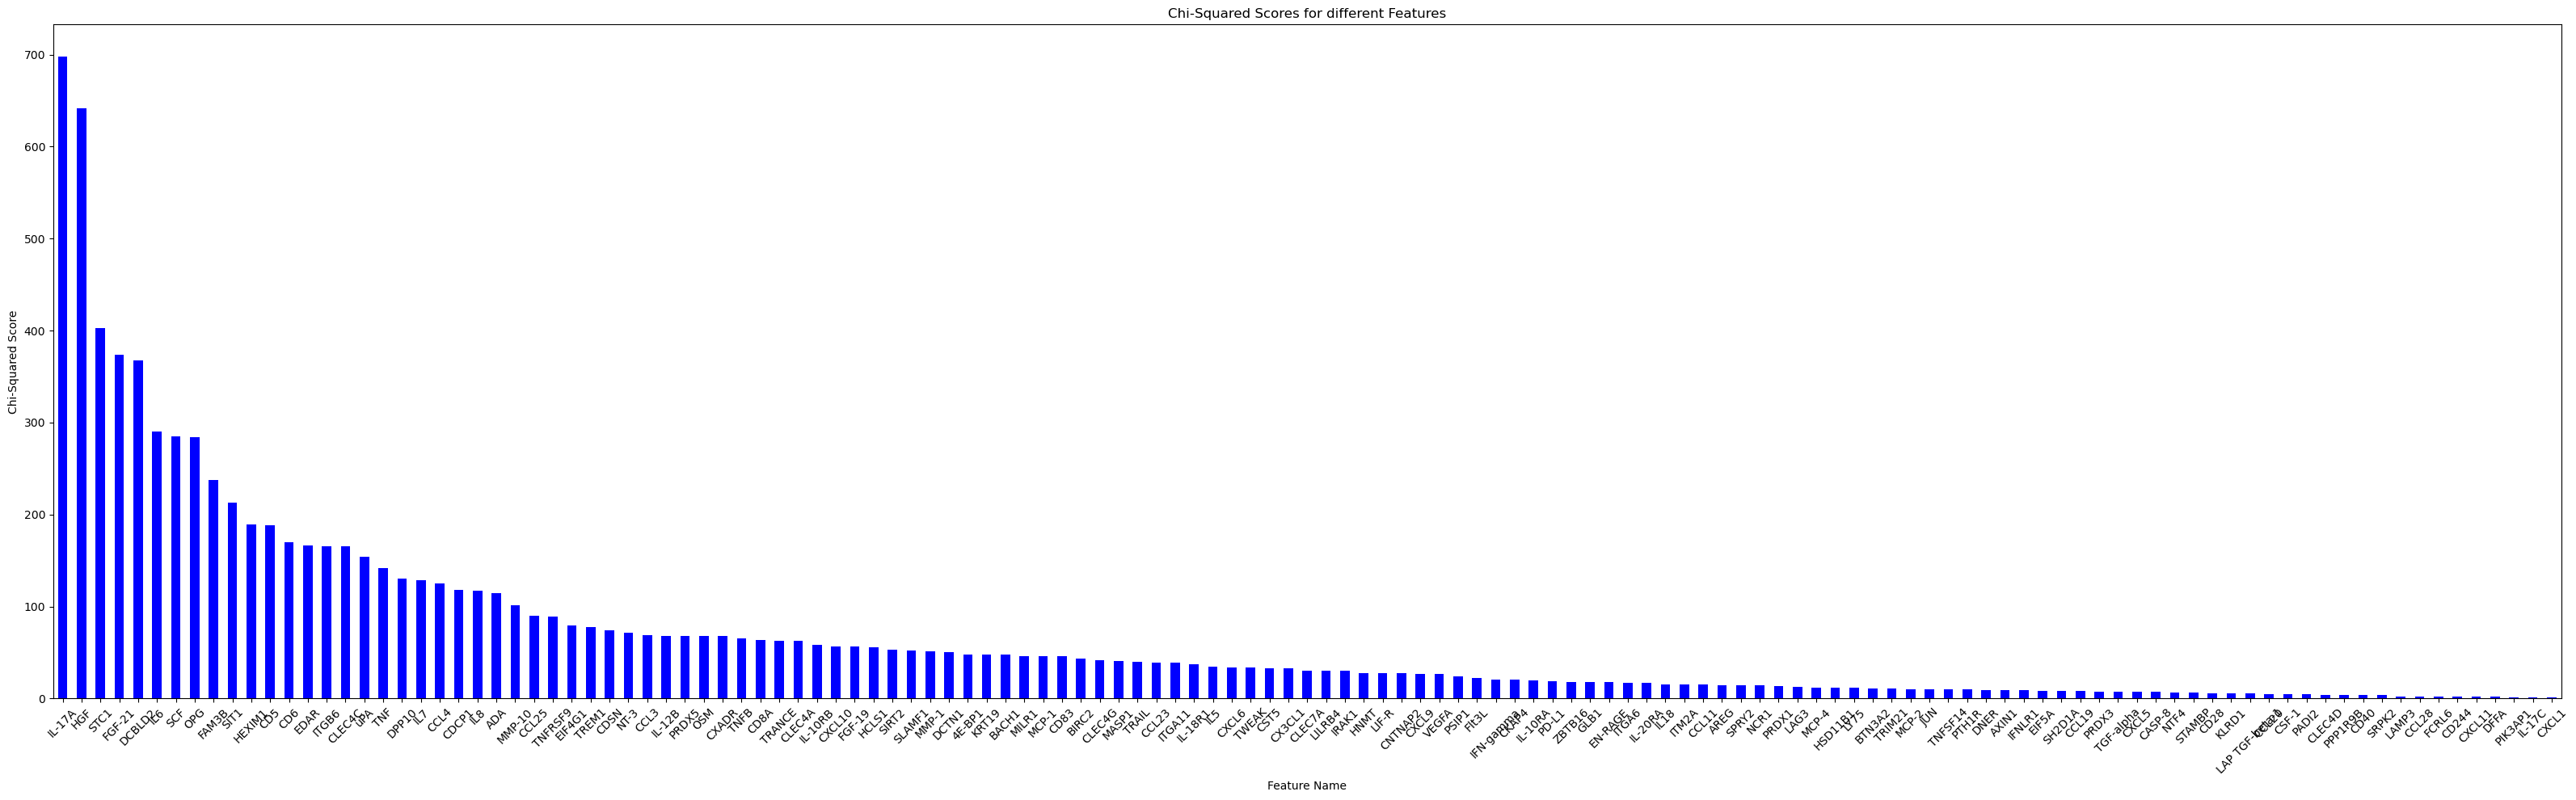

In [503]:
'''
TODO: Implement another filter-based feature selection method other than Mutual Information using 10-fold cross validation
      and use the results to choose the top 20 features
'''
"""
Using Chi-square test 
Higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training
"""
# Separate out features and labels from the data 
features = data.iloc[:, :-1]
labels = data.iloc[:, -1]
 
# don't use stratified fold 
cross_validation = KFold(n_splits=10, shuffle=True, random_state=1)

def chiSquare (f, l):
      num_of_features = 20
      total_mutual_information_score = np.zeros(133)
      for i, j in cross_validation.split(f, l):
            f_train, f_test = f.iloc[i], f.iloc[j]
            l_train, l_test = l.iloc[i], l.iloc[j]
            chi_scores, pvals = chi2(f_train, l_train)
            # chi_values = pd.Series(chi_scores[0], index = features.columns)
            total_score = np.add(total_mutual_information_score, chi_scores)

      # avg_chi_score = total_score/10
      # sorted_chi_scores = np.argsort(avg_chi_score)[::-1]
      
      sorted_chi_scores = np.argsort(total_score)[::-1]


      twenty_top_features = sorted_chi_scores[:num_of_features]
     
      # Top 20 features
      features_chi_square = dict()
      for index in twenty_top_features:
            feature_name = f.columns[index]
            # c_score = avg_chi_score[index]
            c_score = total_score[index]
            features_chi_square[feature_name] = c_score

      # All features sorted based on their chi square  
      chi_scores = dict()
      for index in sorted_chi_scores:
            feature_name = f.columns[index]
            # ch_score = avg_chi_score[index]
            ch_score = total_score[index]
            chi_scores[feature_name] = ch_score

     
      return features_chi_square, chi_scores

features_c, scores_c = chiSquare(features, labels)
# scores_c
scores_c = pd.Series(scores_c)
plt.figure(figsize=(32, 10))
scores_c.plot(kind='bar', color='blue')


# plt.bar(list(scores_c.keys()), list(scores_c.values()))  
plt.xlabel('Feature Name')
plt.ylabel('Chi-Squared Score')
plt.title('Chi-Squared Scores for different Features')
plt.xticks(rotation=45)  
plt.tight_layout()

# Display the plot
plt.show()



## 2.3: Correlation Heatmap

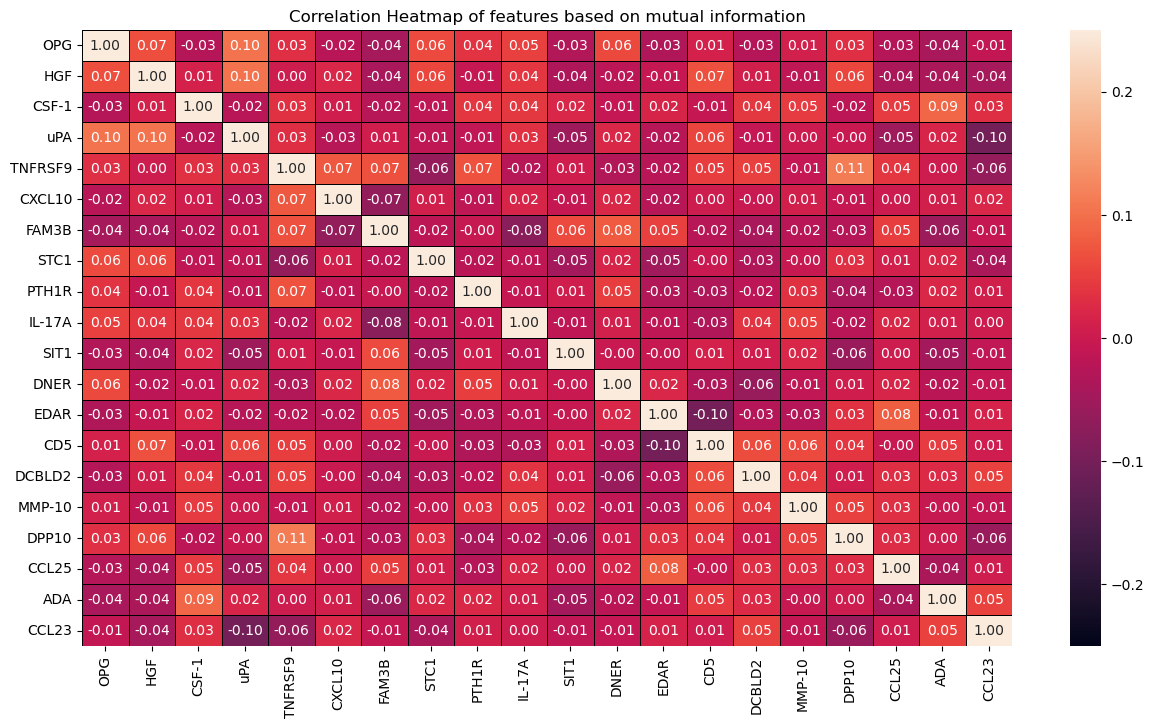

In [504]:
'''
TODO: Create and plot a 20 x 20 correlation heatmap using your features based on mutual information

TIPS: 1. Pandas has a correlation functionality for dataframes
        https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
     2. Seaborn has a heatmap functionality
        https://seaborn.pydata.org/generated/seaborn.heatmap.html
'''

selected_features = data[list(twenty_features.keys())]
# decrease the scale for the colors 
plt.figure(figsize=(15, 8))
sns.heatmap(selected_features.corr(), annot = True, linewidths=0.5, linecolor='black', fmt='.2f', vmin=-0.25, vmax=0.25)
plt.title('Correlation Heatmap of features based on mutual information')
plt.show()

In [505]:
'''
TODO: Calculate the average of the values in the heatmap.
'''
# .values.mean
# average row-wise and average again 
selected_features.corr().mean().mean()

0.05409837097443389

## Part 2.4: Classifier

In [506]:
'''
TODO: Train a classifier using your top 1, top 2, ..., top 20 features based on mutual information

TIPS: 1. scikit-learn has a great collection of classifiers: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
      2. scikit-learn also supports different ways of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators
'''

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def classifier(features, labels, top20): 
      random_forest_accuracy = dict()
      top20features = list(top20.keys())
      predictions = dict()
      for i in range(1, 21):
            num_to_use = top20features[:i]
            X_to_use = features[num_to_use]
            X_train, X_test, y_train, y_test = train_test_split(X_to_use, labels, test_size=0.2, random_state=42)
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_test)
            predictions[i] = y_pred
            stratified_cv = KFold(n_splits=10)
            cross_val_scores = cross_val_score(rf, X_train, y_train, cv=stratified_cv)
            random_forest_accuracy[i] = cross_val_scores.mean()
      return predictions, random_forest_accuracy

rf_predictions, rf_classfier_accuracies = classifier(X, y, twenty_features)



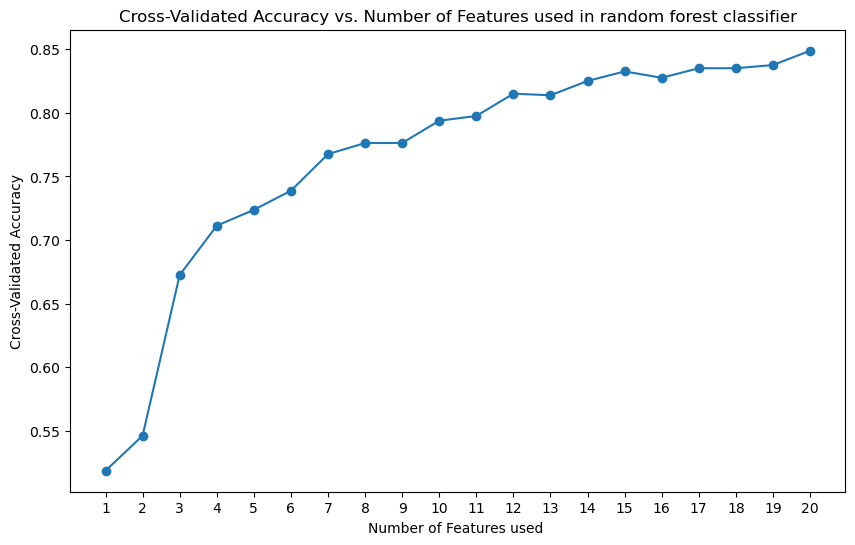

In [507]:
'''
TODO: Plot the 10-fold cross-validated accuracy as a function of the number of features
'''
plt.figure(figsize=(10, 6))
plt.plot(list(rf_classfier_accuracies.keys()), list(rf_classfier_accuracies.values()), marker = 'o')
plt.xlabel('Number of Features used ')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs. Number of Features used in random forest classifier')
plt.xticks(list(rf_classfier_accuracies.keys()))
plt.show()


# Question 3: Wrapper-based Feature Selection

## 3.1: Wrapper-based feature selection

In [508]:
'''
TODO: Apply a wrapper-based feature selection method of your choice to the data.
  Use the results to choose the top 20 features
  You don't need to implement 10-fold cross validation for this question.

TIPS: 1. Note that wrapper-based feature selection methods can be computationally intensive and time-consuming.
      You could choose a simpler model. You could increase the limit number of features to remove.
      You might also use random sampling instead of using the entire dataset for each iteration.
      If not designed carefully, this step could take a long time.
      2. The mlxtend library has very thorough documentation and great options for sequential and exhaustive feature selection
        http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
        http://rasbt.github.io/mlxtend/user_guide/feature_selection/ExhaustiveFeatureSelector/
      3. Scikit learn has an implementation of recursive feature elimination (RFE) and recursive feature elimination with cross-validation (RFECV)
        https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV
        https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
'''

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

rf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=20)
rfe.fit(X, y)
ranking = rfe.ranking_

## 3.2: Top features

In [509]:
'''
TODO: List the top 20 features selected by your method:
'''
top_twenty_features = X.columns[rfe.support_]
top_twenty_features


Index(['ADA', 'CCL23', 'CD5', 'CLEC4C', 'CSF-1', 'CXCL10', 'DCBLD2', 'DNER',
       'DPP10', 'EDAR', 'FAM3B', 'HGF', 'IL-17A', 'ITGB6', 'OPG', 'PTH1R',
       'SCF', 'STC1', 'TNFRSF9', 'uPA'],
      dtype='object')

## 3.3: Correlation heatmap


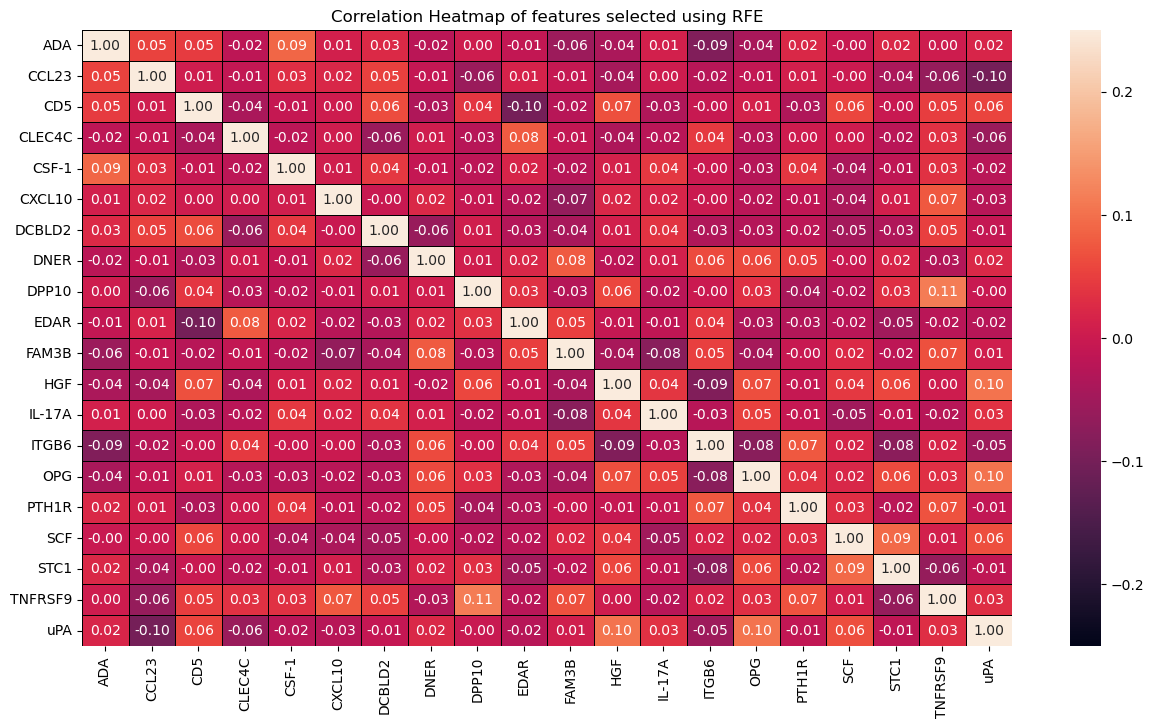

In [510]:
'''
TODO: Create and plot a correlation heatmap using your features from part 3.2
'''

plt.figure(figsize=(15, 8))
sns.heatmap(data[top_twenty_features].corr(), annot = True, linewidths=0.5, linecolor='black', fmt='.2f', vmin=-0.25, vmax=0.25)
plt.title('Correlation Heatmap of features selected using RFE')
plt.show()

In [511]:
'''
TODO: Calculate the average of the values in the heatmap.
'''
average_for_RFE = data[top_twenty_features].corr().values.mean()
average_for_RFE

0.05175905843110558

## 3.4: Classifier

In [512]:
'''
TODO: Train a classifier using your features from part 3.2 with 10-fold cross validation
'''

X = data[top_twenty_features]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_RFE = RandomForestClassifier(n_estimators=100, random_state=42)
rf_RFE.fit(X_train, y_train)
y_pred = rf_RFE.predict(X_test)


In [513]:
'''
TODO: Compute the 10-fold cross-validated accuracy of the classifier trained with these features.
'''
stratified_cv_RFE = KFold(n_splits=10)
cross_val_scores = cross_val_score(rf_RFE, X_train, y_train, cv=stratified_cv_RFE)
print("The 10-fold cross-validated accuracy of the random forest classifier trained with features selected by using RFE is",cross_val_scores.mean())

The 10-fold cross-validated accuracy of the random forest classifier trained with features selected by using RFE is 0.845


# Question 4: Embedded Feature Selection

## 4.1: Embedded Feature Selection

In [514]:
'''
TODO: Apply a tree-based embedded feature selection method using 10-fold cross validation

TIPS: 1. See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
        and/or https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
        for tree based methods
      2. Check out the SelectFromModel functionality from
        https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
'''

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


'''
each fold 
  train random forest 
  get top 20 features 
  keep track of the frequency of the features 
'''


def treeBased(X, y):
    cv_tree = KFold(n_splits=10, shuffle= True, random_state=1)
    features_selected = dict()
    important_features_fold_counts = {}
    for train_index, test_index in cv_tree.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        random_f = RandomForestClassifier(n_estimators=100, random_state=42)
        random_f.fit(X_train, y_train)
        important_features = random_f.feature_importances_.argsort()[-20:][::-1]
        
        
        for idx in important_features:
          important_features_fold_counts[idx]= important_features_fold_counts.get(idx, 0)+1

    return important_features_fold_counts

dt_features = treeBased(X, y)
dt_features


{100: 10,
 59: 10,
 32: 10,
 51: 10,
 119: 10,
 130: 10,
 45: 10,
 111: 10,
 37: 10,
 67: 10,
 123: 10,
 79: 10,
 42: 10,
 110: 10,
 11: 10,
 46: 10,
 114: 5,
 47: 10,
 1: 8,
 26: 4,
 19: 8,
 96: 5}

## 4.2: Top Features

In [515]:
'''
TODO: List the top features selected in at least 8 out of 10 folds:
'''
# tree_based_eight_folds = [feature_name for feature_name, count in dt_features.items() if count >= 8]
# selected_columns = X.iloc[:, tree_based_eight_folds]
# print(selected_columns.columns)

tree_based_eight_folds = [feature_index for feature_index, count in dt_features.items() if count >= 8]
print(tree_based_eight_folds)
selected_columns = X.iloc[:, tree_based_eight_folds]
column_names = selected_columns.columns
print(column_names)

[100, 59, 32, 51, 119, 130, 45, 111, 37, 67, 123, 79, 42, 110, 11, 46, 47, 1, 19]
Index(['OPG', 'HGF', 'CSF-1', 'FAM3B', 'STC1', 'uPA', 'DNER', 'SCF', 'CXCL10',
       'IL-17A', 'TNFRSF9', 'ITGB6', 'DCBLD2', 'PTH1R', 'CCL23', 'DPP10',
       'EDAR', 'ADA', 'CD5'],
      dtype='object')


## 4.3: Correlation Heatmap

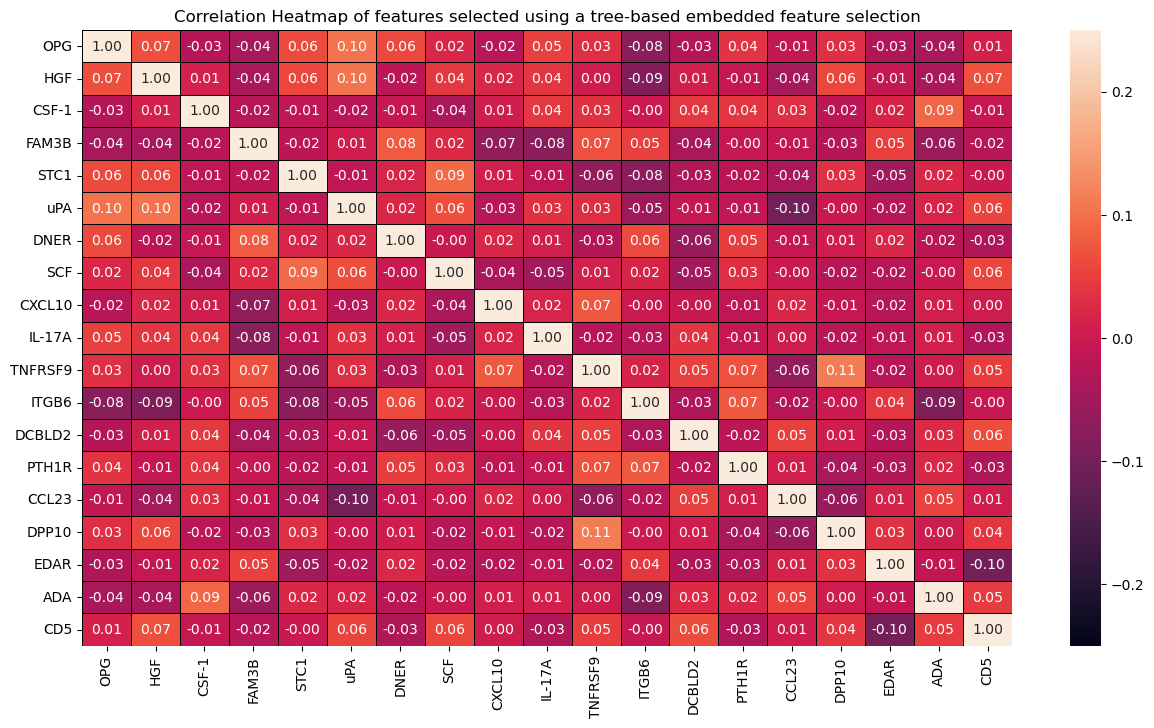

In [516]:
'''
TODO: Create and plot a correlation heat map using your features from part 4.2
'''
plt.figure(figsize=(15, 8))
sns.heatmap(X.iloc[:, tree_based_eight_folds].corr(), annot=True, linewidths=0.5, linecolor='black', fmt='.2f', vmin=-0.25, vmax=0.25)
plt.title('Correlation Heatmap of features selected using a tree-based embedded feature selection')
plt.show()

In [517]:
'''
TODO: Calculate the average of the values in the heatmap.
'''
average_for_tree_based = X.iloc[:, tree_based_eight_folds].corr().values.mean()
average_for_tree_based

0.05553956795693814

## 4.4: Classifier

In [518]:
'''
TODO: Train a classifier using your features from part 4.2 with 10-fold cross validation
'''
X = data.iloc[:, tree_based_eight_folds]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r = RandomForestClassifier(n_estimators=100, random_state=42)
r.fit(X_train, y_train)
y_pred = r.predict(X_test)

In [519]:
'''
TODO: Compute the 10-fold cross-validated accuracy of the classifier trained with these features.
'''
cv = StratifiedKFold(n_splits=10)
cross_val_scores = cross_val_score(r, X_train, y_train, cv=cv)
print("The 10-fold cross-validated accuracy of the random forest classifier trained with features selected by using a tree based embedded feature selection is",cross_val_scores.mean())

The 10-fold cross-validated accuracy of the random forest classifier trained with features selected by using a tree based embedded feature selection is 0.85


# Question 5

## 5.1 Venn diagram

/Users/sinhanushka_/opt/anaconda3/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


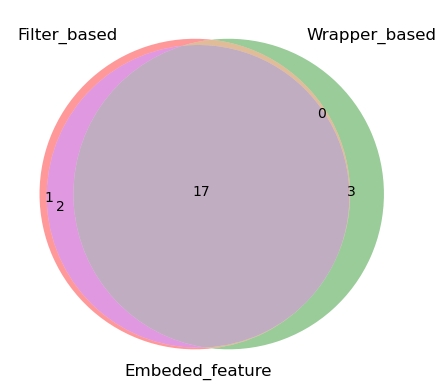

In [520]:
'''
TODO: Plot a Venn diagram to show the overlap between different feature selection methods.
  Display the names of the features selected by all your methods.

TIP: You could use matplotlib_venn.
'''

top_twenty_features_list = top_twenty_features.tolist()
selected_features_filter_based = list(twenty_features.keys())
tree_based = selected_columns
set1 = set(top_twenty_features_list)
set2 = set(selected_features_filter_based)
set3 = set(selected_columns)


venn3([set1, set2, set3], set_labels=('Filter_based', 'Wrapper_based', 'Embeded_feature'))


plt.show()


In [521]:
# find overlap between all combinations of methods
common_features_filter_wrapper = set1.intersection(set2) 
print("The common features between the filter based method and wrapper based method are:",common_features_filter_wrapper) 
print(len(common_features_filter_wrapper))

common_features_filter_tree = set1.intersection(set3) 
print("The common features between the filter based method and tree based method are:",common_features_filter_tree) 
print(len(common_features_filter_tree))

common_features_tree_wrapper = set2.intersection(set3)
print("The common features between the wrapper based method and tree based method are:",common_features_tree_wrapper)
print(len(common_features_tree_wrapper)) 

common_features = set1.intersection(set2, set3)
print("The common features between the filter based method, wrapper based method, and tree based method are:", common_features)
print(len(common_features))


The common features between the filter based method and wrapper based method are: {'uPA', 'HGF', 'CD5', 'FAM3B', 'CXCL10', 'EDAR', 'CCL23', 'STC1', 'PTH1R', 'DPP10', 'TNFRSF9', 'CSF-1', 'DNER', 'IL-17A', 'ADA', 'OPG', 'DCBLD2'}
17
The common features between the filter based method and tree based method are: {'SCF', 'CCL23', 'EDAR', 'TNFRSF9', 'CSF-1', 'DNER', 'OPG', 'uPA', 'HGF', 'CD5', 'STC1', 'CXCL10', 'ADA', 'FAM3B', 'ITGB6', 'PTH1R', 'DPP10', 'IL-17A', 'DCBLD2'}
19
The common features between the wrapper based method and tree based method are: {'uPA', 'HGF', 'CD5', 'FAM3B', 'STC1', 'EDAR', 'CCL23', 'CXCL10', 'PTH1R', 'DPP10', 'TNFRSF9', 'CSF-1', 'DNER', 'IL-17A', 'ADA', 'OPG', 'DCBLD2'}
17
The common features between the filter based method, wrapper based method, and tree based method are: {'uPA', 'HGF', 'FAM3B', 'CD5', 'CXCL10', 'EDAR', 'CCL23', 'STC1', 'PTH1R', 'DPP10', 'TNFRSF9', 'CSF-1', 'DNER', 'IL-17A', 'ADA', 'OPG', 'DCBLD2'}
17
